In [2]:
import pandas as pd # Import pandas library, which contains a collection of data manipulation modules.
import sqlite3      # Import sqlite3 library, which contains a collection of SQL database modules.  
con = sqlite3.connect('chinook.db') # Connection established.
cursor = con.cursor()            # Built-in cursor function called.
# sql = "SELECT country, COUNT(*) AS count FROM customers GROUP BY country"  # Select aggregated value and GROUP the result.
# sql = "SELECT country, COUNT(*) AS count FROM customers GROUP BY country ORDER BY count;"
# sql = "SELECT country, COUNT(*) AS count FROM customers GROUP BY country ORDER BY count DESC;"   
# sql = "SELECT trackid,tracks.name,albums.Title AS album,media_types.Name AS media,genres.Name AS genres FROM tracks INNER JOIN albums ON Albums.AlbumId = tracks.AlbumId INNER JOIN media_types ON media_types.MediaTypeId = tracks.MediaTypeId INNER JOIN genres ON genres.GenreId = tracks.GenreId WHERE genres = 'Jazz';"  
sql = "SELECT trackid,tracks.name,albums.Title AS album,media_types.Name AS media,genres.Name AS genres FROM tracks INNER JOIN albums ON Albums.AlbumId = tracks.AlbumId INNER JOIN media_types ON media_types.MediaTypeId = tracks.MediaTypeId INNER JOIN genres ON genres.GenreId = tracks.GenreId;"  
try:
    cursor.execute(sql)
    con.commit()
    print("Entry successfully retrieved.")
except Exception as e:
    print("Exception occurred.",e)
# Display results
result = cursor.fetchall()
# print(type(result))
# print(result)
# print(pd.DataFrame(result)) 
# print('\n')
con.close()
df = pd.DataFrame(result, columns=[ 
'Track ID','Track Name','Album Titles','Media Type','Genres'
  ])
df

Entry successfully retrieved.


,Track ID,Track Name,Album Titles,Media Type,Genres
0,1,For Those About To Rock (We Salute You),For Those About To Rock We Salute You,MPEG audio file,Rock
1,2,Balls to the Wall,Balls to the Wall,Protected AAC audio file,Rock
2,3,Fast As a Shark,Restless and Wild,Protected AAC audio file,Rock
3,4,Restless and Wild,Restless and Wild,Protected AAC audio file,Rock
4,5,Princess of the Dawn,Restless and Wild,Protected AAC audio file,Rock
...,...,...,...,...,...
3498,3499,Pini Di Roma (Pinien Von Rom) \ I Pini Della V...,Respighi:Pines of Rome,Protected AAC audio file,Classical
3499,3500,"String Quartet No. 12 in C Minor, D. 703 ""Quar...",Schubert: The Late String Quartets & String Qu...,Protected AAC audio file,Classical
3500,3501,"L'orfeo, Act 3, Sinfonia (Orchestra)",Monteverdi: L'Orfeo,Protected AAC audio file,Classical
3501,3502,"Quintet for Horn, Violin, 2 Violas, and Cello ...",Mozart: Chamber Music,Protected AAC audio file,Classical


In [21]:
import pandas as pd # Import pandas library, which contains a collection of data manipulation modules.
import sqlite3      # Import sqlite3 library, which contains a collection of SQL database modules.  
con = sqlite3.connect('chinook.db') # Connection established.
cursor = con.cursor()            # Built-in cursor function called.
sql = "SELECT trackid,tracks.name,albums.Title AS album, media_types.Name AS media,genres.Name AS genres FROM tracks INNER JOIN albums ON Albums.AlbumId = tracks.AlbumId INNER JOIN media_types ON media_types.MediaTypeId = tracks.MediaTypeId INNER JOIN genres ON genres.GenreId = tracks.GenreId;"  
try:
    cursor.execute(sql)
    con.commit()
    print("Entry successfully retrieved.")
except Exception as e:
    print("Exception occurred.",e)
result = cursor.fetchall()
df = pd.DataFrame(result, columns=[ 
'ID','Name','Album','Type','Genres'
  ])
df.to_sql('results',con,if_exists='replace',index=False)
con.close()
df

Entry successfully retrieved.


,ID,Name,Album,Type,Genres
0,1,For Those About To Rock (We Salute You),For Those About To Rock We Salute You,MPEG audio file,Rock
1,2,Balls to the Wall,Balls to the Wall,Protected AAC audio file,Rock
2,3,Fast As a Shark,Restless and Wild,Protected AAC audio file,Rock
3,4,Restless and Wild,Restless and Wild,Protected AAC audio file,Rock
4,5,Princess of the Dawn,Restless and Wild,Protected AAC audio file,Rock
...,...,...,...,...,...
3498,3499,Pini Di Roma (Pinien Von Rom) \ I Pini Della V...,Respighi:Pines of Rome,Protected AAC audio file,Classical
3499,3500,"String Quartet No. 12 in C Minor, D. 703 ""Quar...",Schubert: The Late String Quartets & String Qu...,Protected AAC audio file,Classical
3500,3501,"L'orfeo, Act 3, Sinfonia (Orchestra)",Monteverdi: L'Orfeo,Protected AAC audio file,Classical
3501,3502,"Quintet for Horn, Violin, 2 Violas, and Cello ...",Mozart: Chamber Music,Protected AAC audio file,Classical


Entry successfully retrieved.


<ipython-input-24-1f025f7e0a7f>:23: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.subplot()


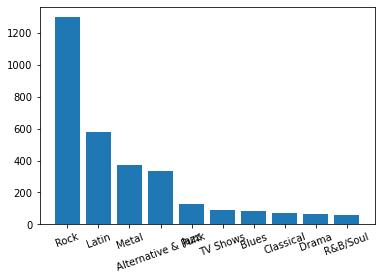

In [24]:
import pandas as pd 
import sqlite3 
from matplotlib import pyplot as plt
con = sqlite3.connect('chinook.db')
cursor = con.cursor()        
sql="SELECT ID,COUNT(Name) as Track,Genres FROM results GROUP BY genres Order By Track DESC LIMIT 10;"
try:
    cursor.execute(sql)
    con.commit()
    print("Entry successfully retrieved.")
except Exception as e:
    print("Exception occurred.",e)
result = cursor.fetchall()
con.close()
df = pd.DataFrame(result, columns=[ 
'Track ID','Track Count','Genres'
  ])
df
Genres = ["Rock", "Latin", "Metal", "Alternative & Punk", "Jazz", "TV Shows","Blues","Classical","Drama","R&B/Soul"]
Count = [1297,579,374,332,130,93,81,74,64,61]
plt.bar(range(len(Genres)),Count)
ax = plt.subplot()
ax.set_xticks([0,1,2,3,4,5,6,7,8,9])
ax.set_xticklabels(Genres, rotation=20)
plt.show()